# **Machine Learning Week 4 Assignment**
### **Inchara Polepalli Muneshkumar**
**Student ID - 20307270**

**Dataset IDs - 23--23-23-0 and 23-23--23-0**

In [ ]:
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline
plt.rcParams["figure.figsize"]=[12,9]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve

In [ ]:
df1 = pd.read_csv("/content/drive/My Drive/ML/week4_DataSet1.csv",comment='#',header=None)
print (df1.head())
#DS1 refers to dataset 1
DS1_X1 = df1.iloc[:,0]
DS1_X2 = df1.iloc[:,1]
DS1_X = np.column_stack((DS1_X1,DS1_X2))
DS1_y = df1.iloc[:,2]

      0     1  2
0 -0.29  0.62  1
1  0.34  0.98  1
2 -0.67  0.50  1
3  0.85 -0.90 -1
4  0.44 -0.02 -1


In [ ]:
df2 = pd.read_csv("/content/drive/My Drive/ML/week4_DataSet2.csv",comment='#',header=None)
print (df2.head())
#DS2 refers to dataset 2
DS2_X1 = df2.iloc[:,0]
DS2_X2 = df2.iloc[:,1]
DS2_X = np.column_stack((DS2_X1,DS2_X2))
DS2_y = df2.iloc[:,2]

      0     1  2
0 -0.38 -0.37  1
1  0.51 -0.96  1
2  0.81 -0.98  1
3 -0.48 -0.93  1
4  0.79  0.73 -1


**Question (i)**

In [ ]:
from sklearn.model_selection import train_test_split
DS1_Xtrain, DS1_Xtest, DS1_ytrain, DS1_ytest = train_test_split(DS1_X,DS1_y,test_size=0.2)
from sklearn.dummy import DummyClassifier
DS1_dummy = DummyClassifier(strategy="most_frequent").fit(DS1_Xtrain, DS1_ytrain)
DS1_ydummy = DS1_dummy.predict(DS1_Xtest)
print("The Dummy model accuracy is",metrics.accuracy_score(DS1_ytest, DS1_ydummy))
print("The Dummy model confusion matrix\n",metrics.confusion_matrix(DS1_ytest, DS1_ydummy))
print("The Dummy model report\n",metrics.classification_report(DS1_ytest, DS1_ydummy))

The Dummy model accuracy is 0.6609686609686609
The Dummy model confusion matrix
 [[232   0]
 [119   0]]
The Dummy model report
               precision    recall  f1-score   support

          -1       0.66      1.00      0.80       232
           1       0.00      0.00      0.00       119

    accuracy                           0.66       351
   macro avg       0.33      0.50      0.40       351
weighted avg       0.44      0.66      0.53       351



In [ ]:
def logistic(c,Xpoly):
  model = LogisticRegression(penalty='l2',C=c)
  return model

In [ ]:
def cross_val (model,Xpoly,y,plot):
  temp=[]
  kf = KFold(n_splits=5)
  for train, test in kf.split(Xpoly):
    model.fit(Xpoly[train], y[train])
    ypred = model.predict(Xpoly[test])
    score = metrics.accuracy_score(y[test],ypred)
    report = metrics.classification_report(y[test],ypred)
    cm = metrics.confusion_matrix(y[test],ypred)
    temp.append(score)
    print("The LogisticRegression model accuracy is",score)
    print("The LogisticRegression model report\n",report)
    print("The LogisticRegression model confusion matrix\n",cm)
    if(plot):
      X_test = Xpoly[test]
      y_test = y[test]
      training_df = pd.DataFrame(np.column_stack((X_test[:,1],X_test[:,2],y_test)))
      training_df.columns =['X1', 'X2', 'y']
      by_class = training_df.groupby('y')
      for groups, data in by_class:
        if(groups == -1):
          plt.scatter(data['X1'],data['X2'],color="blue",marker="s",label="-1 training")
        else:
          plt.scatter(data['X1'],data['X2'],color="green",marker="s",label="+1 training")
      prediction_df = pd.DataFrame(np.column_stack((X_test[:,1],X_test[:,2],ypred)))
      prediction_df.columns =['X1', 'X2', 'y_pred']
      by_class_pred = prediction_df.groupby('y_pred')
      for groups_pred, data_pred in by_class_pred:
        if(groups_pred == -1):
          plt.scatter(data_pred['X1'],data_pred['X2'],color="yellow",marker=".",label="-1 prediction")
        else:
          plt.scatter(data_pred['X1'],data_pred['X2'],color="black",marker=".",label="+1 prediction")
      subplot = plt.gca()
      subplot.autoscale(False)
      plt.xlabel("X1")
      plt.ylabel("X2")
      plt.legend(loc = (1.04,0))
      plt.figure()
      plt.show()
      fpr, tpr, _ = roc_curve(y_test,model.decision_function(X_test))
      plt.plot(fpr,tpr,label="roc for model")
      plt.xlabel('False positive rate')
      plt.ylabel('True positive rate')
      plt.plot([0, 1], [0, 1], color='green',linestyle='--',label="baseline")
      plt.legend(loc = (1.04,0))
      plt.show()
  print("The LogisticRegression model has a mean accuracy of",np.array(temp).mean())

**Varying the order of polynomial by keeping a constant value for C**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
model1= logistic(1,DS1_X)
cross_val(model1,DS1_X,DS1_y,False)

The LogisticRegression model accuracy is 0.9088319088319088
The LogisticRegression model report
               precision    recall  f1-score   support

          -1       0.94      0.93      0.94       252
           1       0.83      0.86      0.84        99

    accuracy                           0.91       351
   macro avg       0.88      0.89      0.89       351
weighted avg       0.91      0.91      0.91       351

The LogisticRegression model confusion matrix
 [[234  18]
 [ 14  85]]
The LogisticRegression model accuracy is 0.8888888888888888
The LogisticRegression model report
               precision    recall  f1-score   support

          -1       0.91      0.93      0.92       240
           1       0.84      0.80      0.82       111

    accuracy                           0.89       351
   macro avg       0.87      0.87      0.87       351
weighted avg       0.89      0.89      0.89       351

The LogisticRegression model confusion matrix
 [[223  17]
 [ 22  89]]
The Logistic

In [ ]:
model2= logistic(1,DS1_X)
cross_val(model2,PolynomialFeatures(2).fit_transform(DS1_X),DS1_y,False)

The LogisticRegression model accuracy is 0.9686609686609686
The LogisticRegression model report
               precision    recall  f1-score   support

          -1       0.98      0.98      0.98       252
           1       0.95      0.94      0.94        99

    accuracy                           0.97       351
   macro avg       0.96      0.96      0.96       351
weighted avg       0.97      0.97      0.97       351

The LogisticRegression model confusion matrix
 [[247   5]
 [  6  93]]
The LogisticRegression model accuracy is 0.9772079772079773
The LogisticRegression model report
               precision    recall  f1-score   support

          -1       0.99      0.98      0.98       240
           1       0.96      0.97      0.96       111

    accuracy                           0.98       351
   macro avg       0.97      0.98      0.97       351
weighted avg       0.98      0.98      0.98       351

The LogisticRegression model confusion matrix
 [[235   5]
 [  3 108]]
The Logistic

The LogisticRegression model accuracy is 0.9743589743589743
The LogisticRegression model report
               precision    recall  f1-score   support

          -1       0.98      0.99      0.98       252
           1       0.97      0.94      0.95        99

    accuracy                           0.97       351
   macro avg       0.97      0.96      0.97       351
weighted avg       0.97      0.97      0.97       351

The LogisticRegression model confusion matrix
 [[249   3]
 [  6  93]]


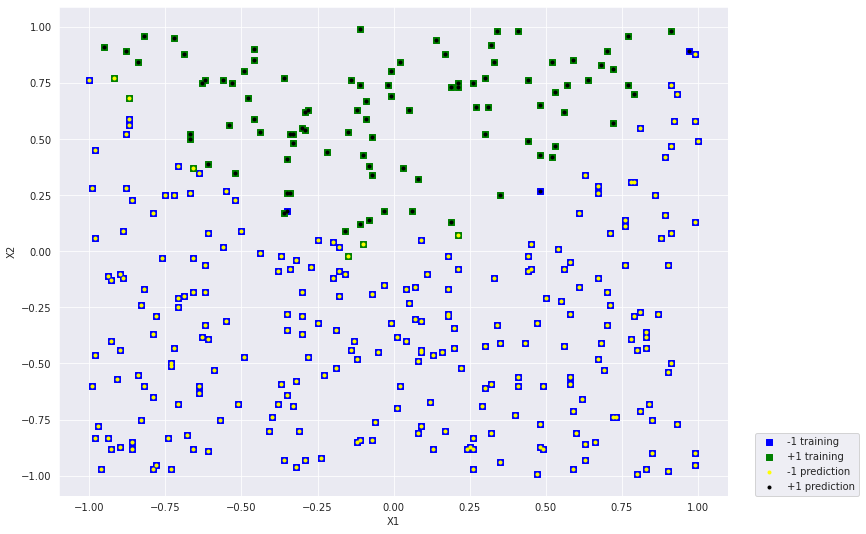

<Figure size 864x648 with 0 Axes>

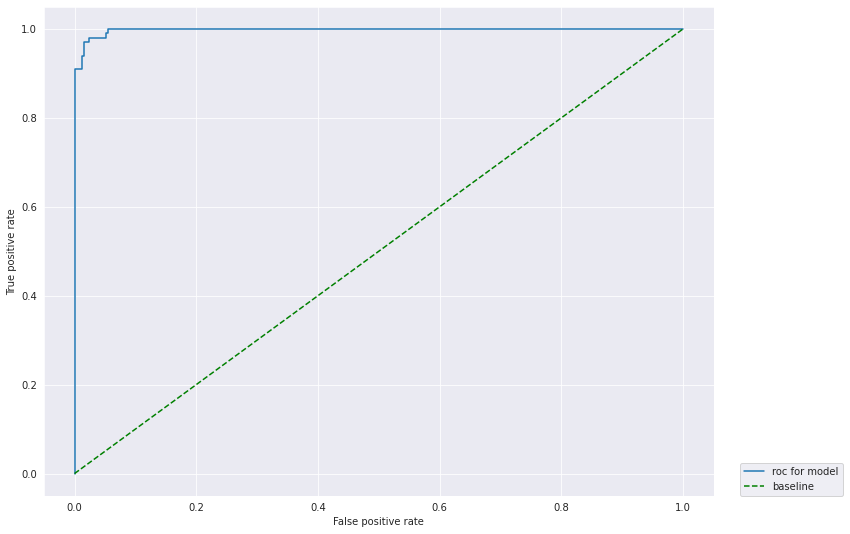

The LogisticRegression model accuracy is 0.9743589743589743
The LogisticRegression model report
               precision    recall  f1-score   support

          -1       0.98      0.98      0.98       240
           1       0.96      0.96      0.96       111

    accuracy                           0.97       351
   macro avg       0.97      0.97      0.97       351
weighted avg       0.97      0.97      0.97       351

The LogisticRegression model confusion matrix
 [[235   5]
 [  4 107]]


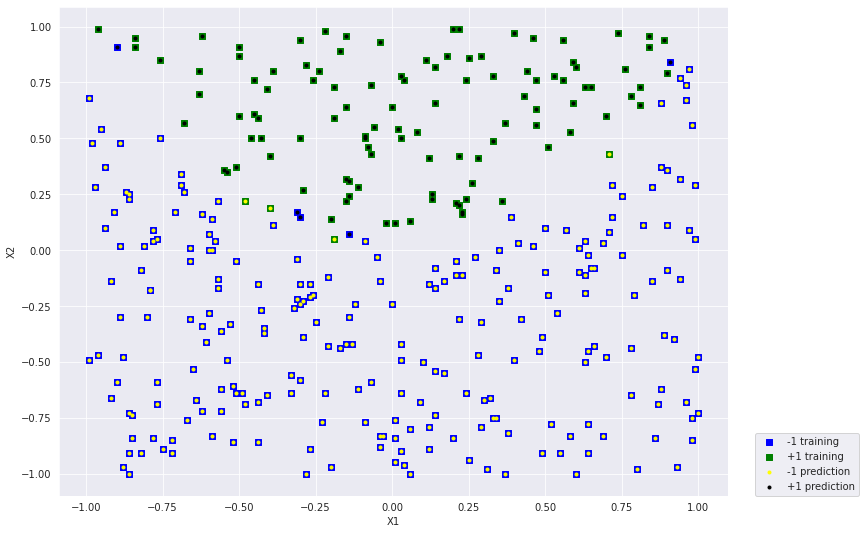

<Figure size 864x648 with 0 Axes>

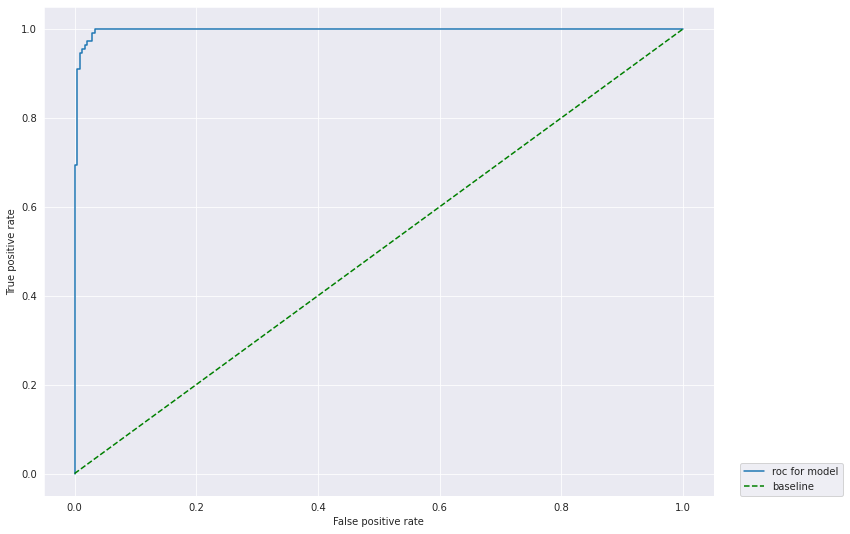

The LogisticRegression model accuracy is 0.9371428571428572
The LogisticRegression model report
               precision    recall  f1-score   support

          -1       0.94      0.97      0.95       230
           1       0.93      0.88      0.91       120

    accuracy                           0.94       350
   macro avg       0.94      0.92      0.93       350
weighted avg       0.94      0.94      0.94       350

The LogisticRegression model confusion matrix
 [[222   8]
 [ 14 106]]


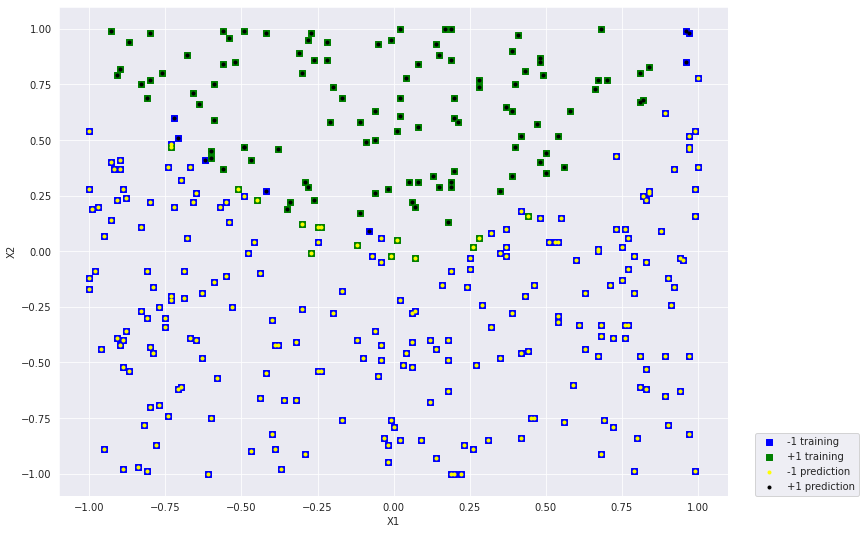

<Figure size 864x648 with 0 Axes>

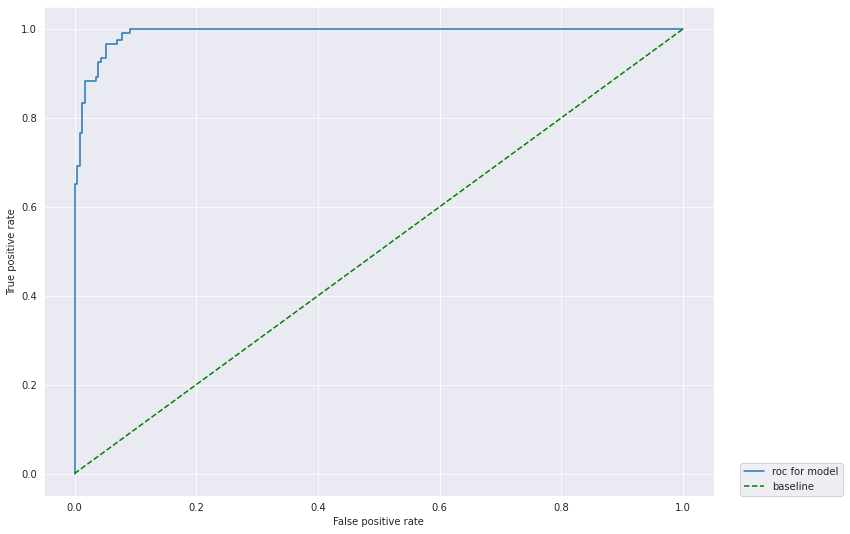

The LogisticRegression model accuracy is 0.9685714285714285
The LogisticRegression model report
               precision    recall  f1-score   support

          -1       0.96      0.99      0.97       215
           1       0.98      0.94      0.96       135

    accuracy                           0.97       350
   macro avg       0.97      0.96      0.97       350
weighted avg       0.97      0.97      0.97       350

The LogisticRegression model confusion matrix
 [[212   3]
 [  8 127]]


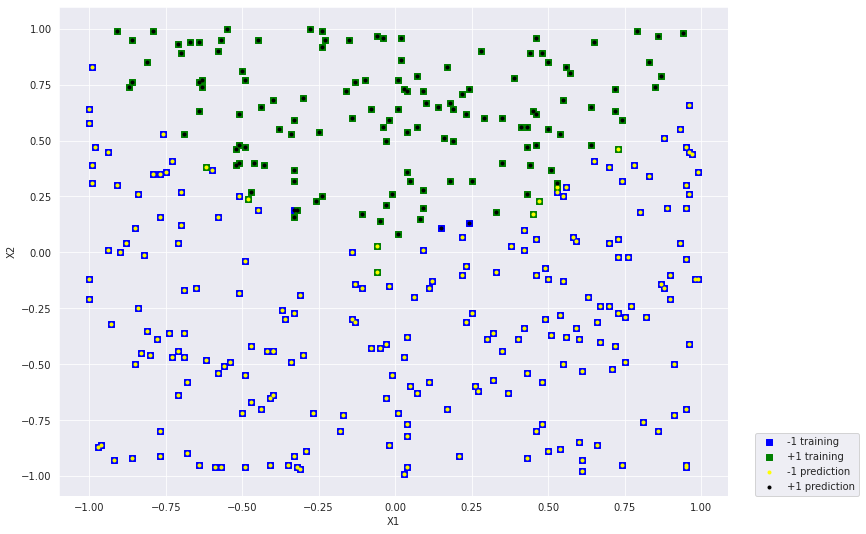

<Figure size 864x648 with 0 Axes>

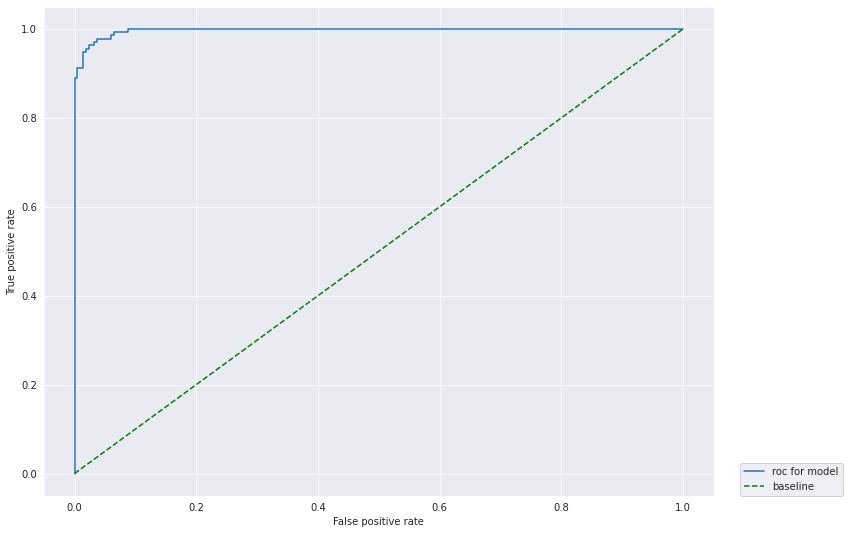

The LogisticRegression model accuracy is 0.94
The LogisticRegression model report
               precision    recall  f1-score   support

          -1       0.95      0.96      0.96       233
           1       0.91      0.91      0.91       117

    accuracy                           0.94       350
   macro avg       0.93      0.93      0.93       350
weighted avg       0.94      0.94      0.94       350

The LogisticRegression model confusion matrix
 [[223  10]
 [ 11 106]]


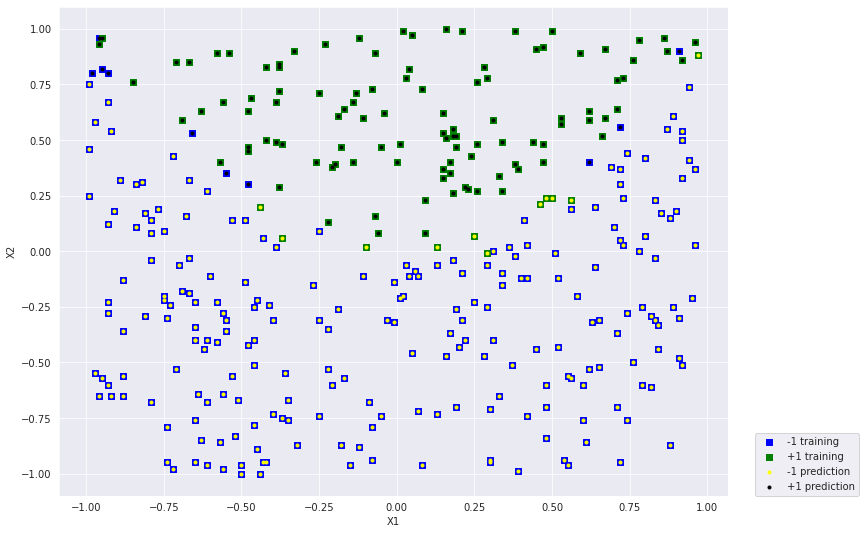

<Figure size 864x648 with 0 Axes>

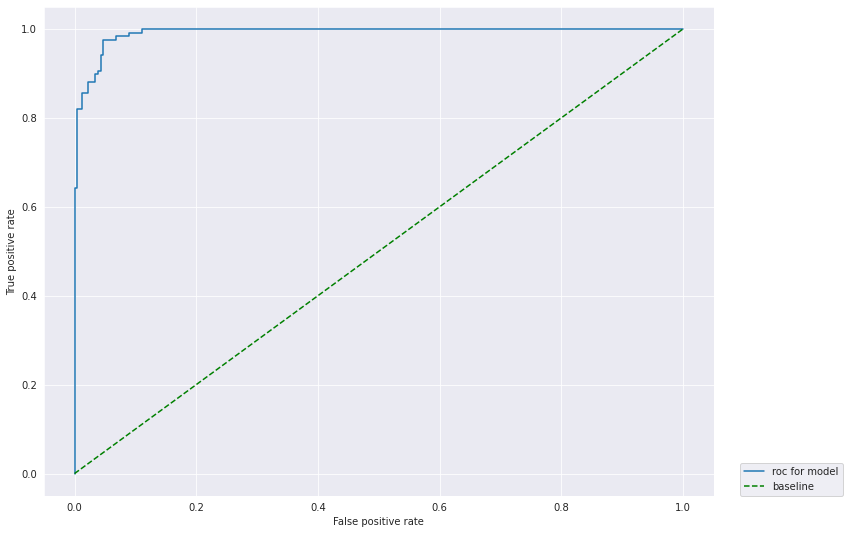

The LogisticRegression model has a mean accuracy of 0.9588864468864469


In [ ]:
model3= logistic(1,DS1_X)
cross_val(model3,PolynomialFeatures(3).fit_transform(DS1_X),DS1_y,True)

In [ ]:
model4= logistic(1,DS1_X)
cross_val(model4,PolynomialFeatures(4).fit_transform(DS1_X),DS1_y,False)

The LogisticRegression model accuracy is 0.9772079772079773
The LogisticRegression model report
               precision    recall  f1-score   support

          -1       0.98      0.99      0.98       252
           1       0.98      0.94      0.96        99

    accuracy                           0.98       351
   macro avg       0.98      0.97      0.97       351
weighted avg       0.98      0.98      0.98       351

The LogisticRegression model confusion matrix
 [[250   2]
 [  6  93]]
The LogisticRegression model accuracy is 0.9772079772079773
The LogisticRegression model report
               precision    recall  f1-score   support

          -1       0.98      0.98      0.98       240
           1       0.96      0.96      0.96       111

    accuracy                           0.98       351
   macro avg       0.97      0.97      0.97       351
weighted avg       0.98      0.98      0.98       351

The LogisticRegression model confusion matrix
 [[236   4]
 [  4 107]]
The Logistic

In [ ]:
model5= logistic(1,DS1_X)
cross_val(model5,PolynomialFeatures(5).fit_transform(DS1_X),DS1_y,False)

The LogisticRegression model accuracy is 0.9772079772079773
The LogisticRegression model report
               precision    recall  f1-score   support

          -1       0.98      0.99      0.98       252
           1       0.98      0.94      0.96        99

    accuracy                           0.98       351
   macro avg       0.98      0.97      0.97       351
weighted avg       0.98      0.98      0.98       351

The LogisticRegression model confusion matrix
 [[250   2]
 [  6  93]]
The LogisticRegression model accuracy is 0.9772079772079773
The LogisticRegression model report
               precision    recall  f1-score   support

          -1       0.98      0.98      0.98       240
           1       0.96      0.96      0.96       111

    accuracy                           0.98       351
   macro avg       0.97      0.97      0.97       351
weighted avg       0.98      0.98      0.98       351

The LogisticRegression model confusion matrix
 [[236   4]
 [  4 107]]
The Logistic

**Varying the value of C by keeping the order = 3**

In [ ]:
model3_1= logistic(0.1,DS1_X)
cross_val(model3_1,PolynomialFeatures(3).fit_transform(DS1_X),DS1_y,False)

The LogisticRegression model accuracy is 0.9544159544159544
The LogisticRegression model report
               precision    recall  f1-score   support

          -1       0.96      0.98      0.97       252
           1       0.95      0.89      0.92        99

    accuracy                           0.95       351
   macro avg       0.95      0.93      0.94       351
weighted avg       0.95      0.95      0.95       351

The LogisticRegression model confusion matrix
 [[247   5]
 [ 11  88]]
The LogisticRegression model accuracy is 0.9458689458689459
The LogisticRegression model report
               precision    recall  f1-score   support

          -1       0.94      0.98      0.96       240
           1       0.95      0.87      0.91       111

    accuracy                           0.95       351
   macro avg       0.95      0.93      0.94       351
weighted avg       0.95      0.95      0.95       351

The LogisticRegression model confusion matrix
 [[235   5]
 [ 14  97]]
The Logistic

In [ ]:
model3_2= logistic(0.01,DS1_X)
cross_val(model3_2,PolynomialFeatures(3).fit_transform(DS1_X),DS1_y,False)

The LogisticRegression model accuracy is 0.8974358974358975
The LogisticRegression model report
               precision    recall  f1-score   support

          -1       0.89      0.98      0.93       252
           1       0.93      0.69      0.79        99

    accuracy                           0.90       351
   macro avg       0.91      0.83      0.86       351
weighted avg       0.90      0.90      0.89       351

The LogisticRegression model confusion matrix
 [[247   5]
 [ 31  68]]
The LogisticRegression model accuracy is 0.8689458689458689
The LogisticRegression model report
               precision    recall  f1-score   support

          -1       0.86      0.97      0.91       240
           1       0.91      0.65      0.76       111

    accuracy                           0.87       351
   macro avg       0.88      0.81      0.83       351
weighted avg       0.87      0.87      0.86       351

The LogisticRegression model confusion matrix
 [[233   7]
 [ 39  72]]
The Logistic

In [ ]:
model3_3= logistic(2,DS1_X)
cross_val(model3_3,PolynomialFeatures(3).fit_transform(DS1_X),DS1_y,False)

The LogisticRegression model accuracy is 0.9772079772079773
The LogisticRegression model report
               precision    recall  f1-score   support

          -1       0.98      0.99      0.98       252
           1       0.97      0.95      0.96        99

    accuracy                           0.98       351
   macro avg       0.97      0.97      0.97       351
weighted avg       0.98      0.98      0.98       351

The LogisticRegression model confusion matrix
 [[249   3]
 [  5  94]]
The LogisticRegression model accuracy is 0.9772079772079773
The LogisticRegression model report
               precision    recall  f1-score   support

          -1       0.99      0.98      0.98       240
           1       0.96      0.97      0.96       111

    accuracy                           0.98       351
   macro avg       0.97      0.98      0.97       351
weighted avg       0.98      0.98      0.98       351

The LogisticRegression model confusion matrix
 [[235   5]
 [  3 108]]
The Logistic

In [ ]:
model3_4= logistic(5,DS1_X)
cross_val(model3_4,PolynomialFeatures(3).fit_transform(DS1_X),DS1_y,False)

The LogisticRegression model accuracy is 0.9772079772079773
The LogisticRegression model report
               precision    recall  f1-score   support

          -1       0.98      0.99      0.98       252
           1       0.97      0.95      0.96        99

    accuracy                           0.98       351
   macro avg       0.97      0.97      0.97       351
weighted avg       0.98      0.98      0.98       351

The LogisticRegression model confusion matrix
 [[249   3]
 [  5  94]]
The LogisticRegression model accuracy is 0.9715099715099715
The LogisticRegression model report
               precision    recall  f1-score   support

          -1       0.98      0.97      0.98       240
           1       0.95      0.96      0.96       111

    accuracy                           0.97       351
   macro avg       0.97      0.97      0.97       351
weighted avg       0.97      0.97      0.97       351

The LogisticRegression model confusion matrix
 [[234   6]
 [  4 107]]
The Logistic

for c= 0.1 accuracy is [0.89908257 0.88584475 0.90666667 0.92165899 0.89473684]
for c= 1 accuracy is [0.95652174 0.93859649 0.94067797 0.94736842 0.9137931 ]
for c= 2 accuracy is [0.96521739 0.93965517 0.94514768 0.95196507 0.92241379]
for c= 5 accuracy is [0.96969697 0.93965517 0.93723849 0.93965517 0.92703863]
for c= 10 accuracy is [0.96969697 0.93965517 0.93723849 0.94420601 0.92765957]


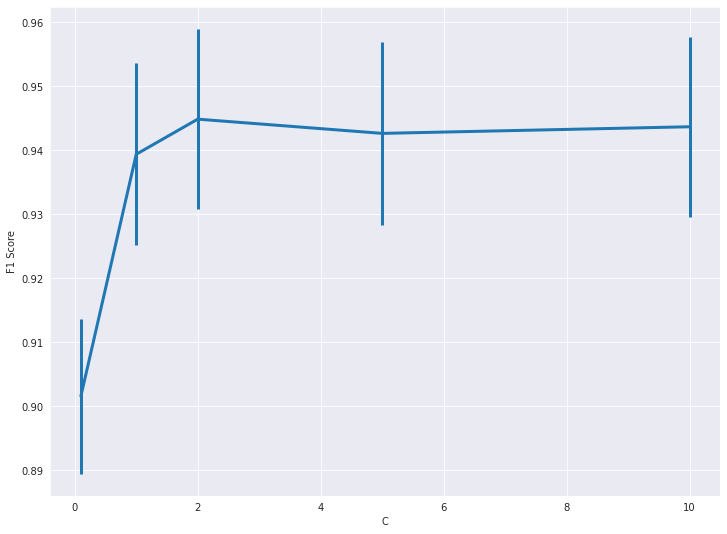

In [ ]:
from sklearn.metrics import f1_score 
Ci_range = [0.1,1,2,5,10]
mean_error = []
std_error = []
for Ci in Ci_range:
  model = LogisticRegression(penalty='l2',C=Ci)
  from sklearn.model_selection import cross_val_score
  scores = cross_val_score(model, PolynomialFeatures(3).fit_transform(DS1_X), DS1_y, cv=5,scoring='f1')
  print("for c= %s accuracy is %s"%(Ci,scores))
  mean_error.append(np.array(scores).mean())
  std_error.append(np.array(scores).std())
plt.errorbar(Ci_range,mean_error,yerr=std_error,linewidth=3)
plt.xlabel('C')
plt.ylabel('F1 Score')
plt.show()

for k= 3 accuracy is [0.97150997 0.95726496 0.94       0.94285714 0.94571429]
for k= 5 accuracy is [0.97150997 0.96011396 0.94857143 0.95142857 0.94857143]
for k= 7 accuracy is [0.97720798 0.95441595 0.95142857 0.95142857 0.95142857]
for k= 10 accuracy is [0.96581197 0.96296296 0.95142857 0.95142857 0.94      ]


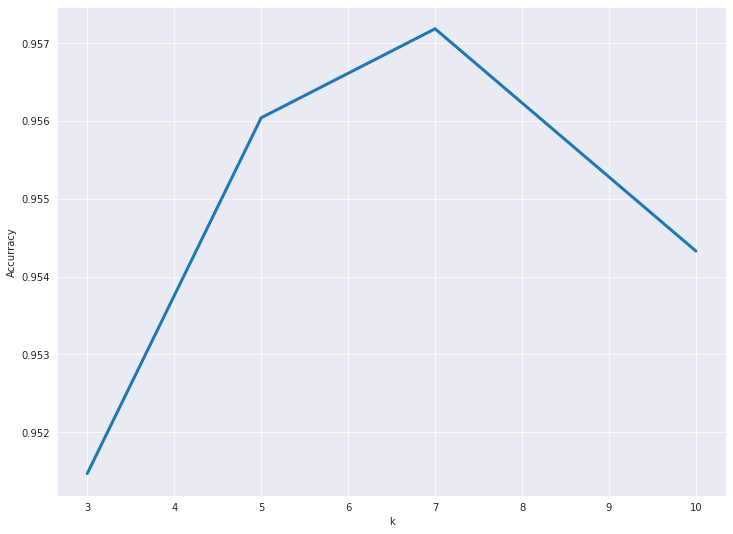

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k_range = [3,5,7,10]
accuracy = []
std_error = []
for k in k_range:
  model = KNeighborsClassifier(n_neighbors=k,weights='uniform')
  scores = cross_val_score(model,DS1_X, DS1_y, cv=5)
  print("for k= %s accuracy is %s"%(k,scores))
  accuracy.append(np.array(scores).mean())
plt.errorbar(k_range,accuracy,linewidth=3)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

for power = 1 accuracy is [0.97720798 0.95441595 0.95142857 0.95142857 0.95142857]
for power = 2 accuracy is [0.97720798 0.95441595 0.94857143 0.95142857 0.94857143]
for power = 3 accuracy is [0.97720798 0.95441595 0.94857143 0.95142857 0.94857143]
for power = 4 accuracy is [0.97720798 0.95441595 0.94857143 0.95142857 0.94857143]
for power = 5 accuracy is [0.97150997 0.95726496 0.94857143 0.95142857 0.94571429]
for power = 6 accuracy is [0.97150997 0.95726496 0.94857143 0.95142857 0.94571429]


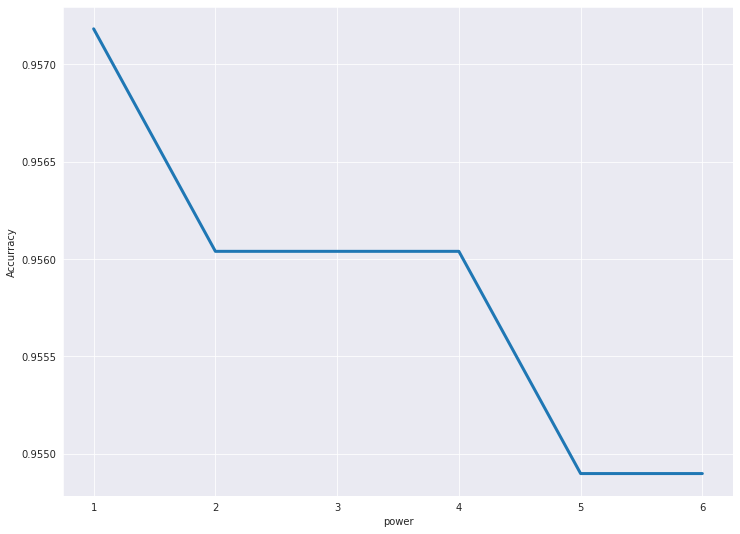

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
power_range = [1,2,3,4,5,6]
accuracy = []
std_error = []
for power in power_range:
  model = KNeighborsClassifier(n_neighbors=7,weights='uniform')
  scores = cross_val_score(model,PolynomialFeatures(power).fit_transform(DS1_X), DS1_y, cv=5)
  print("for power = %s accuracy is %s"%(power,scores))
  accuracy.append(np.array(scores).mean())
plt.errorbar(power_range,accuracy,linewidth=3)
plt.xlabel('power')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
DS1_knn = KNeighborsClassifier(n_neighbors=7,weights='uniform').fit(DS1_Xtrain, DS1_ytrain)
DS1_yknn = DS1_knn.predict(DS1_Xtest)
print("The knn model accuracy is",metrics.accuracy_score(DS1_ytest, DS1_yknn))
print("The knn model confusion matrix\n",metrics.confusion_matrix(DS1_ytest, DS1_yknn))
print("The knn model report\n",metrics.classification_report(DS1_ytest, DS1_yknn))

The knn model accuracy is 0.9401709401709402
The knn model confusion matrix
 [[213  13]
 [  8 117]]
The knn model report
               precision    recall  f1-score   support

          -1       0.96      0.94      0.95       226
           1       0.90      0.94      0.92       125

    accuracy                           0.94       351
   macro avg       0.93      0.94      0.94       351
weighted avg       0.94      0.94      0.94       351



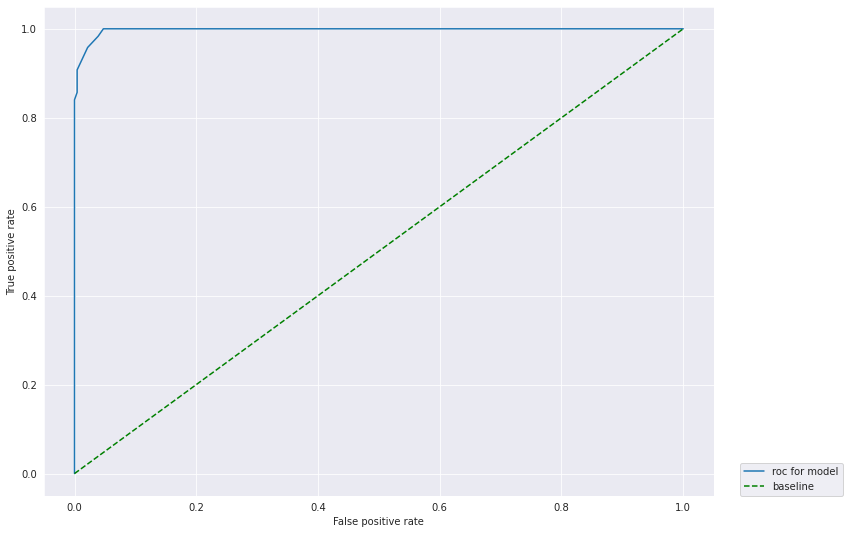

In [ ]:
from sklearn.metrics import roc_curve
y_scores = DS1_knn.predict_proba(DS1_Xtest)
fpr, tpr, threshold = roc_curve(DS1_ytest,y_scores[:,1])
plt.plot(fpr,tpr,label='roc for model')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot([0, 1], [0, 1], color='green',linestyle='--',label='baseline')
plt.legend(loc = (1.04,0))
plt.show()

**Question (ii)**

In [ ]:
DS2_Xtrain, DS2_Xtest, DS2_ytrain, DS2_ytest = train_test_split(DS2_X,DS2_y,test_size=0.2)
DS2_dummy = DummyClassifier(strategy="most_frequent").fit(DS2_Xtrain, DS2_ytrain)
DS2_ydummy = DS2_dummy.predict(DS2_Xtest)
print("The Dummy model accuracy is",metrics.accuracy_score(DS2_ytest, DS2_ydummy))
print("The Dummy model confusion matrix\n",metrics.confusion_matrix(DS2_ytest, DS2_ydummy))
print("The Dummy model report\n",metrics.classification_report(DS2_ytest, DS2_ydummy))

The Dummy model accuracy is 0.7818181818181819
The Dummy model confusion matrix
 [[ 0 24]
 [ 0 86]]
The Dummy model report
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00        24
           1       0.78      1.00      0.88        86

    accuracy                           0.78       110
   macro avg       0.39      0.50      0.44       110
weighted avg       0.61      0.78      0.69       110



In [ ]:
DS2_model_1= logistic(1,DS2_X)
cross_val(DS2_model_1,DS2_X,DS2_y,False)

The LogisticRegression model accuracy is 0.7454545454545455
The LogisticRegression model report
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00        28
           1       0.75      1.00      0.85        82

    accuracy                           0.75       110
   macro avg       0.37      0.50      0.43       110
weighted avg       0.56      0.75      0.64       110

The LogisticRegression model confusion matrix
 [[ 0 28]
 [ 0 82]]
The LogisticRegression model accuracy is 0.6818181818181818
The LogisticRegression model report
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00        35
           1       0.68      1.00      0.81        75

    accuracy                           0.68       110
   macro avg       0.34      0.50      0.41       110
weighted avg       0.46      0.68      0.55       110

The LogisticRegression model confusion matrix
 [[ 0 35]
 [ 0 75]]
The LogisticRegressi

In [ ]:
DS2_model_2= logistic(1,DS2_X)
cross_val(DS2_model_2,PolynomialFeatures(2).fit_transform(DS2_X),DS2_y,False)

The LogisticRegression model accuracy is 0.7454545454545455
The LogisticRegression model report
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00        28
           1       0.75      1.00      0.85        82

    accuracy                           0.75       110
   macro avg       0.37      0.50      0.43       110
weighted avg       0.56      0.75      0.64       110

The LogisticRegression model confusion matrix
 [[ 0 28]
 [ 0 82]]
The LogisticRegression model accuracy is 0.6818181818181818
The LogisticRegression model report
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00        35
           1       0.68      1.00      0.81        75

    accuracy                           0.68       110
   macro avg       0.34      0.50      0.41       110
weighted avg       0.46      0.68      0.55       110

The LogisticRegression model confusion matrix
 [[ 0 35]
 [ 0 75]]
The LogisticRegressi

In [ ]:
DS2_model_3= logistic(1,DS2_X)
cross_val(DS2_model_3,PolynomialFeatures(3).fit_transform(DS2_X),DS2_y,False)

The LogisticRegression model accuracy is 0.7454545454545455
The LogisticRegression model report
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00        28
           1       0.75      1.00      0.85        82

    accuracy                           0.75       110
   macro avg       0.37      0.50      0.43       110
weighted avg       0.56      0.75      0.64       110

The LogisticRegression model confusion matrix
 [[ 0 28]
 [ 0 82]]
The LogisticRegression model accuracy is 0.6818181818181818
The LogisticRegression model report
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00        35
           1       0.68      1.00      0.81        75

    accuracy                           0.68       110
   macro avg       0.34      0.50      0.41       110
weighted avg       0.46      0.68      0.55       110

The LogisticRegression model confusion matrix
 [[ 0 35]
 [ 0 75]]
The LogisticRegressi

In [ ]:
DS2_model_4= logistic(1,DS2_X)
cross_val(DS2_model_4,PolynomialFeatures(4).fit_transform(DS2_X),DS2_y,False)

The LogisticRegression model accuracy is 0.7454545454545455
The LogisticRegression model report
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00        28
           1       0.75      1.00      0.85        82

    accuracy                           0.75       110
   macro avg       0.37      0.50      0.43       110
weighted avg       0.56      0.75      0.64       110

The LogisticRegression model confusion matrix
 [[ 0 28]
 [ 0 82]]
The LogisticRegression model accuracy is 0.6818181818181818
The LogisticRegression model report
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00        35
           1       0.68      1.00      0.81        75

    accuracy                           0.68       110
   macro avg       0.34      0.50      0.41       110
weighted avg       0.46      0.68      0.55       110

The LogisticRegression model confusion matrix
 [[ 0 35]
 [ 0 75]]
The LogisticRegressi

The LogisticRegression model accuracy is 0.7454545454545455
The LogisticRegression model report
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00        28
           1       0.75      1.00      0.85        82

    accuracy                           0.75       110
   macro avg       0.37      0.50      0.43       110
weighted avg       0.56      0.75      0.64       110

The LogisticRegression model confusion matrix
 [[ 0 28]
 [ 0 82]]


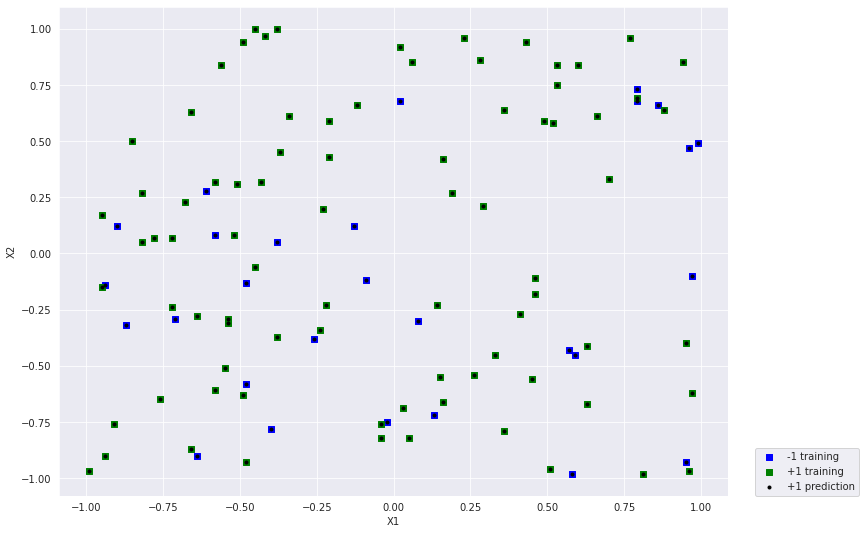

<Figure size 864x648 with 0 Axes>

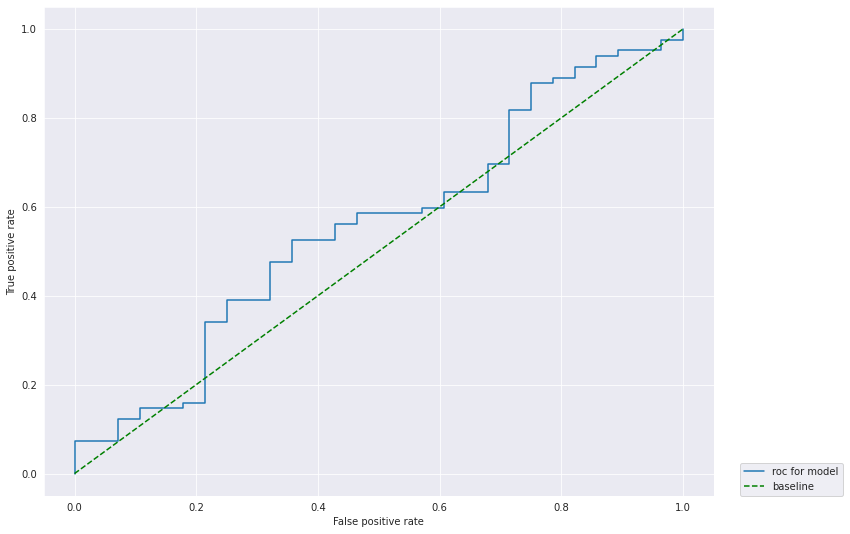

The LogisticRegression model accuracy is 0.6818181818181818
The LogisticRegression model report
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00        35
           1       0.68      1.00      0.81        75

    accuracy                           0.68       110
   macro avg       0.34      0.50      0.41       110
weighted avg       0.46      0.68      0.55       110

The LogisticRegression model confusion matrix
 [[ 0 35]
 [ 0 75]]


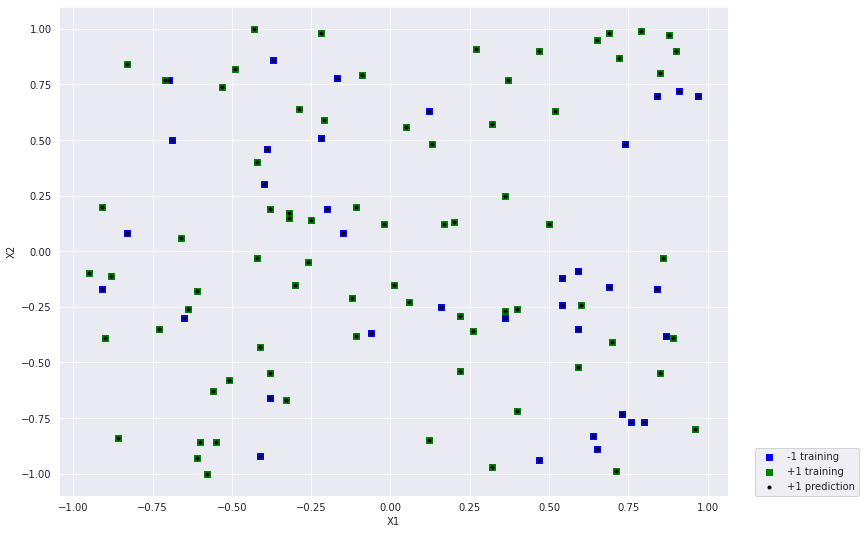

<Figure size 864x648 with 0 Axes>

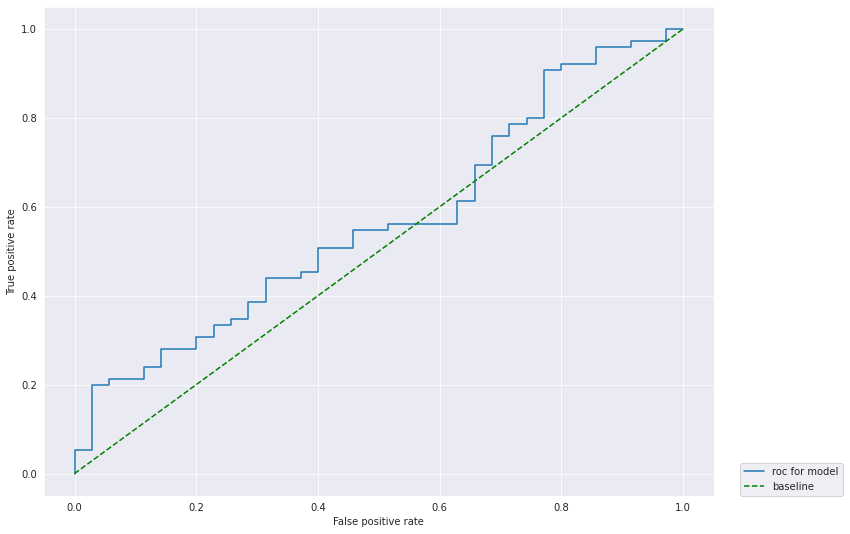

The LogisticRegression model accuracy is 0.7339449541284404
The LogisticRegression model report
               precision    recall  f1-score   support

          -1       1.00      0.03      0.06        30
           1       0.73      1.00      0.84        79

    accuracy                           0.73       109
   macro avg       0.87      0.52      0.45       109
weighted avg       0.81      0.73      0.63       109

The LogisticRegression model confusion matrix
 [[ 1 29]
 [ 0 79]]


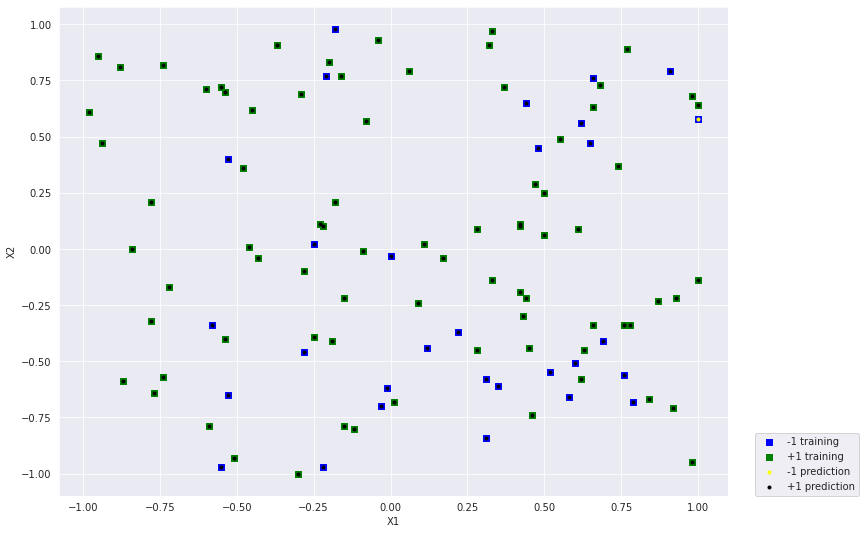

<Figure size 864x648 with 0 Axes>

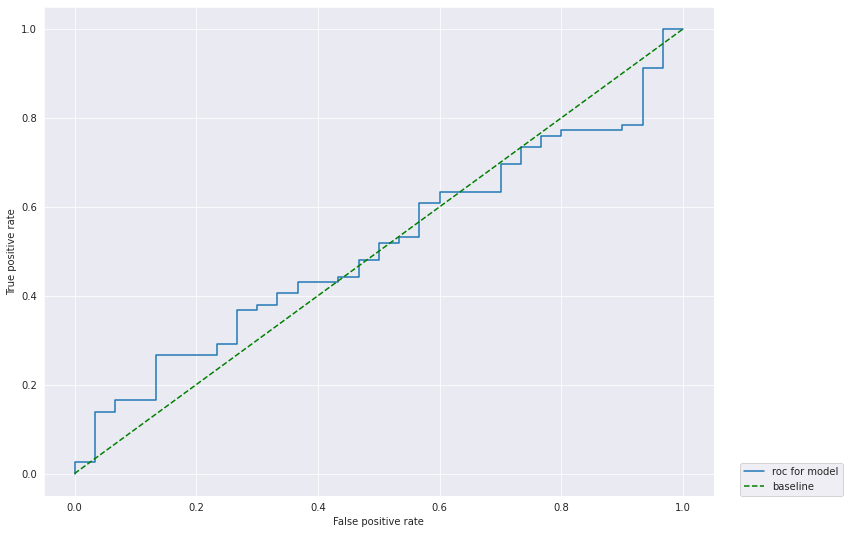

The LogisticRegression model accuracy is 0.6146788990825688
The LogisticRegression model report
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00        42
           1       0.61      1.00      0.76        67

    accuracy                           0.61       109
   macro avg       0.31      0.50      0.38       109
weighted avg       0.38      0.61      0.47       109

The LogisticRegression model confusion matrix
 [[ 0 42]
 [ 0 67]]


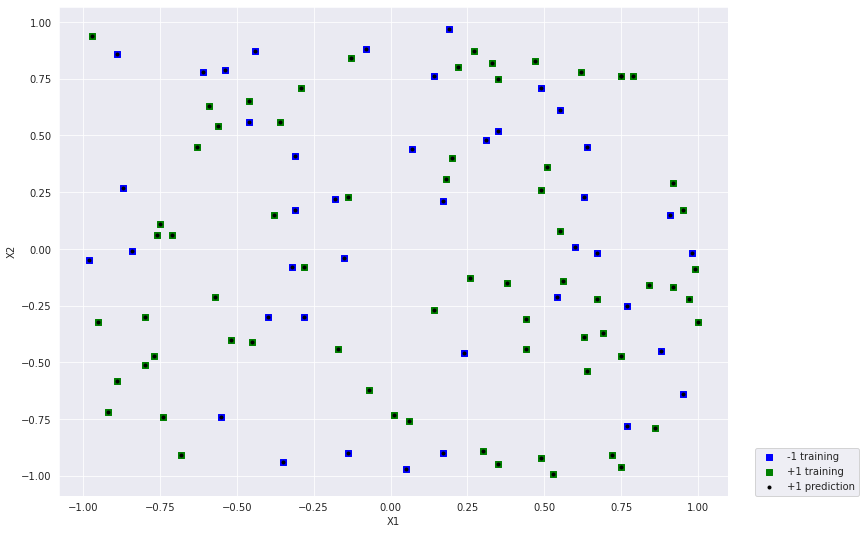

<Figure size 864x648 with 0 Axes>

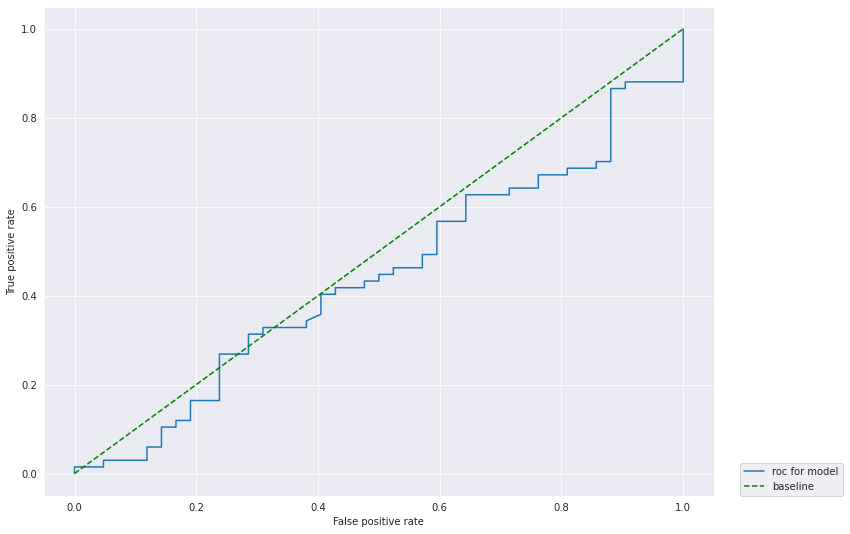

The LogisticRegression model accuracy is 0.6605504587155964
The LogisticRegression model report
               precision    recall  f1-score   support

          -1       1.00      0.03      0.05        38
           1       0.66      1.00      0.79        71

    accuracy                           0.66       109
   macro avg       0.83      0.51      0.42       109
weighted avg       0.78      0.66      0.53       109

The LogisticRegression model confusion matrix
 [[ 1 37]
 [ 0 71]]


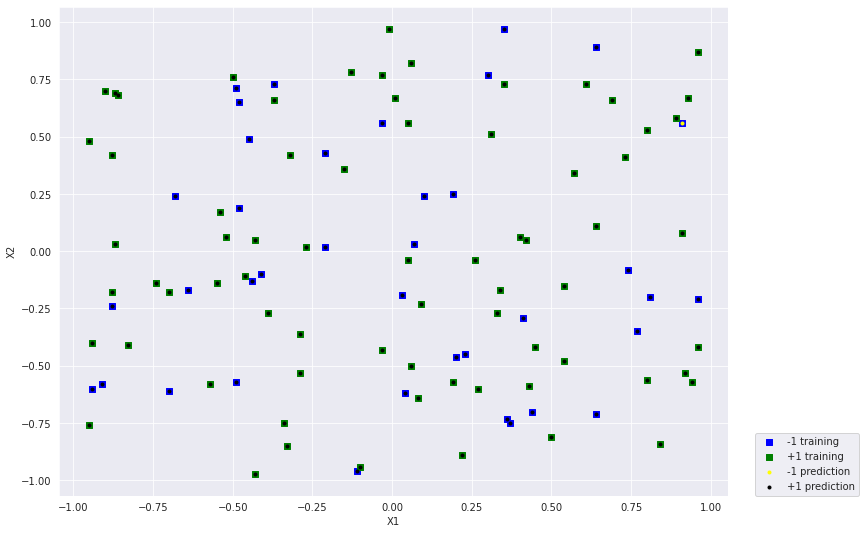

<Figure size 864x648 with 0 Axes>

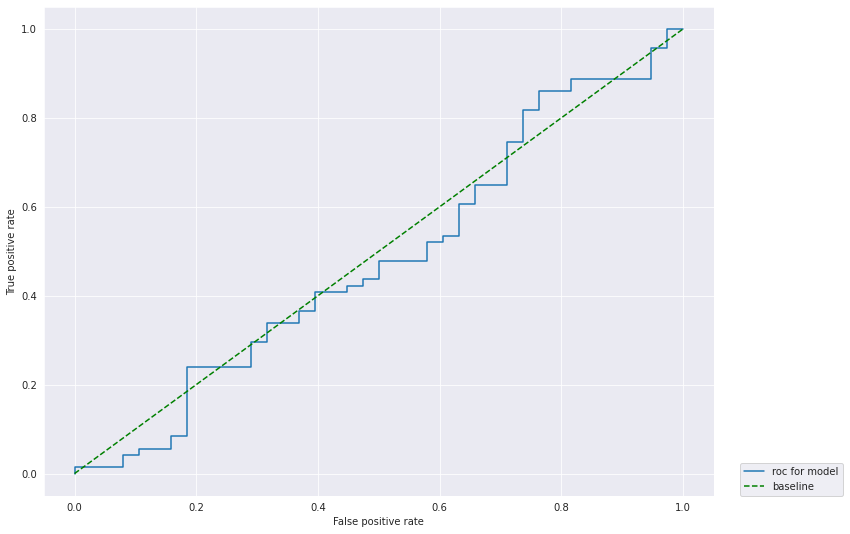

The LogisticRegression model has a mean accuracy of 0.6872894078398666


In [ ]:
DS2_model_5= logistic(1,DS2_X)
cross_val(DS2_model_5,PolynomialFeatures(5).fit_transform(DS2_X),DS2_y,True)

In [ ]:
DS2_model_6= logistic(1,DS2_X)
cross_val(DS2_model_6,PolynomialFeatures(6).fit_transform(DS2_X),DS2_y,False)

for c= 0.01 accuracy is [0.81081081 0.81081081 0.8021978  0.79096045 0.79096045]
for c= 0.1 accuracy is [0.81081081 0.81081081 0.8021978  0.79096045 0.79096045]
for c= 1 accuracy is [0.81081081 0.81081081 0.8021978  0.79096045 0.79096045]
for c= 2 accuracy is [0.81081081 0.81081081 0.8021978  0.79096045 0.79096045]
for c= 5 accuracy is [0.81081081 0.81081081 0.8021978  0.79096045 0.79096045]
for c= 10 accuracy is [0.81081081 0.81081081 0.8021978  0.79096045 0.79096045]
for c= 100 accuracy is [0.81081081 0.81081081 0.8021978  0.79096045 0.79096045]


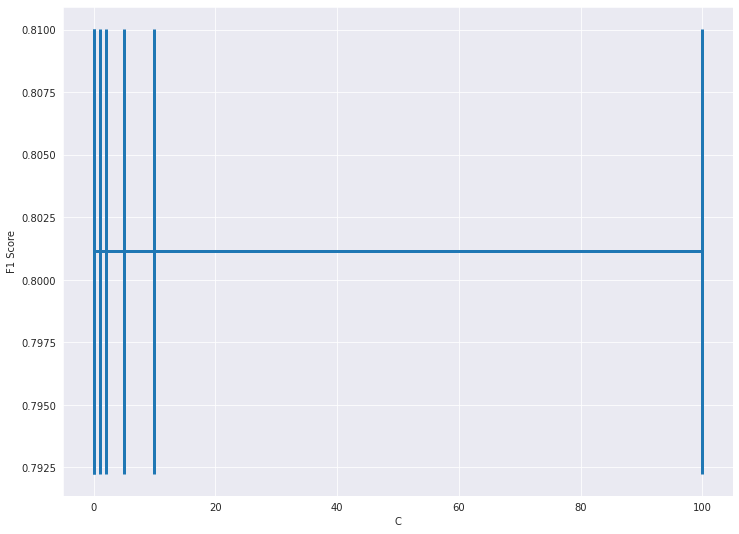

In [ ]:
DS2_Ci_range = [0.01,0.1,1,2,5,10,100]
DS2_mean_error = []
DS2_std_error = []
for DS2_Ci in DS2_Ci_range:
  DS2_model = LogisticRegression(penalty='l2',C=Ci)
  DS2_scores = cross_val_score(DS2_model, PolynomialFeatures(5).fit_transform(DS2_X), DS2_y, cv=5,scoring='f1')
  print("for c= %s accuracy is %s"%(DS2_Ci,DS2_scores))
  DS2_mean_error.append(np.array(DS2_scores).mean())
  DS2_std_error.append(np.array(DS2_scores).std())
plt.errorbar(DS2_Ci_range,DS2_mean_error,yerr=DS2_std_error,linewidth=3)
plt.xlabel('C')
plt.ylabel('F1 Score')
plt.show()

for k= 3 accuracy is [0.60909091 0.62727273 0.58715596 0.55045872 0.62385321]
for k= 5 accuracy is [0.60909091 0.62727273 0.58715596 0.55045872 0.62385321]
for k= 7 accuracy is [0.60909091 0.62727273 0.58715596 0.55045872 0.62385321]
for k= 10 accuracy is [0.60909091 0.62727273 0.58715596 0.55045872 0.62385321]


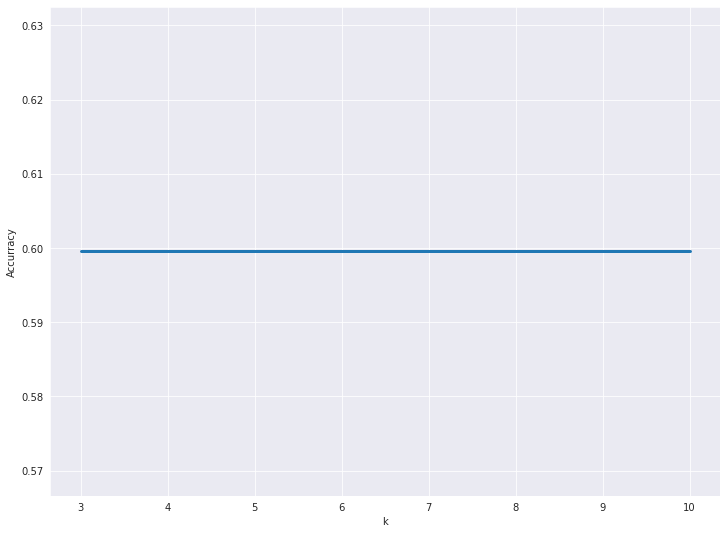

In [ ]:
DS2_k_range = [3,5,7,10]
DS2_accuracy = []
DS2_std_error = []
for DS2_k in DS2_k_range:
  DS2_model = KNeighborsClassifier(n_neighbors=k,weights='uniform')
  DS2_scores = cross_val_score(DS2_model,DS2_X, DS2_y, cv=5)
  print("for k= %s accuracy is %s"%(DS2_k,DS2_scores))
  DS2_accuracy.append(np.array(DS2_scores).mean())
plt.errorbar(DS2_k_range,DS2_accuracy,linewidth=3)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

for power = 1 accuracy is [0.60909091 0.61818182 0.64220183 0.59633028 0.58715596]
for power = 2 accuracy is [0.60909091 0.61818182 0.64220183 0.59633028 0.58715596]
for power = 3 accuracy is [0.60909091 0.61818182 0.64220183 0.59633028 0.58715596]
for power = 4 accuracy is [0.60909091 0.61818182 0.64220183 0.59633028 0.58715596]
for power = 5 accuracy is [0.60909091 0.61818182 0.64220183 0.59633028 0.58715596]
for power = 6 accuracy is [0.60909091 0.61818182 0.64220183 0.59633028 0.58715596]


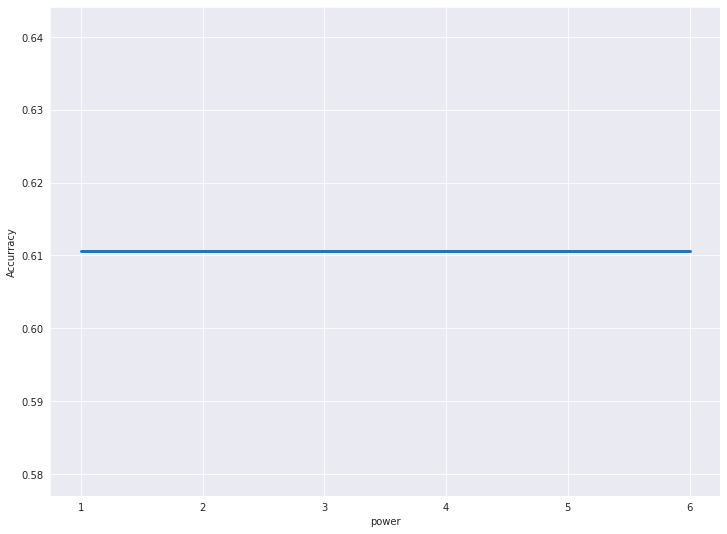

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
DS2_power_range = [1,2,3,4,5,6]
DS2_accuracy = []
DS2_std_error = []
for DS2_power in DS2_power_range:
  DS2_model = KNeighborsClassifier(n_neighbors=7,weights='uniform')
  DS2_scores = cross_val_score(DS2_model,PolynomialFeatures(power).fit_transform(DS2_X), DS2_y, cv=5)
  print("for power = %s accuracy is %s"%(DS2_power,DS2_scores))
  DS2_accuracy.append(np.array(DS2_scores).mean())
plt.errorbar(DS2_power_range,DS2_accuracy,linewidth=3)
plt.xlabel('power')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
DS2_knn = KNeighborsClassifier(n_neighbors=7,weights='uniform').fit(DS2_Xtrain, DS2_ytrain)
DS2_yknn = DS2_knn.predict(DS2_Xtest)
print("The knn model accuracy is",metrics.accuracy_score(DS2_ytest, DS2_yknn))
print("The knn model confusion matrix\n",metrics.confusion_matrix(DS2_ytest, DS2_yknn))
print("The knn model report\n",metrics.classification_report(DS2_ytest, DS2_yknn))

The knn model accuracy is 0.6818181818181818
The knn model confusion matrix
 [[ 4 20]
 [15 71]]
The knn model report
               precision    recall  f1-score   support

          -1       0.21      0.17      0.19        24
           1       0.78      0.83      0.80        86

    accuracy                           0.68       110
   macro avg       0.50      0.50      0.49       110
weighted avg       0.66      0.68      0.67       110



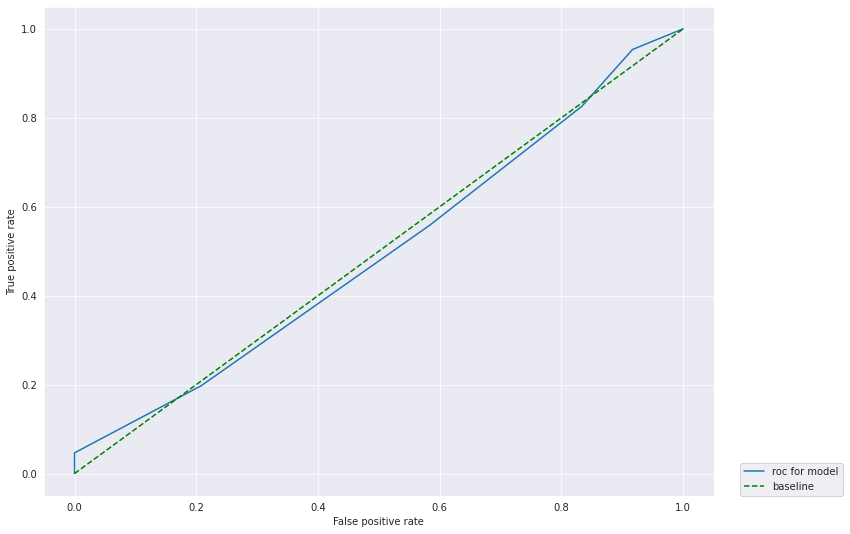

In [ ]:
y_scores = DS2_knn.predict_proba(DS2_Xtest)
fpr, tpr, threshold = roc_curve(DS2_ytest,y_scores[:,1])
plt.plot(fpr,tpr,label="roc for model")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot([0, 1], [0, 1], color='green',linestyle='--',label="baseline")
plt.legend(loc = (1.04,0))
plt.show()

In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

In [ ]:
!jupyter nbconvert --to PDF "/content/drive/My Drive/Colab Notebooks/ML_Assignment_Week4.ipynb"

[NbConvertApp] Converting notebook /content/drive/My Drive/Colab Notebooks/ML_Assignment_Week4.ipynb to PDF
[NbConvertApp] Support files will be in ML_Assignment_Week4_files/
[NbConvertApp] Making directory ./ML_Assignment_Week4_files
[NbConvertApp] Making directory ./ML_Assignment_Week4_files
[NbConvertApp] Making directory ./ML_Assignment_Week4_files
[NbConvertApp] Making directory ./ML_Assignment_Week4_files
[NbConvertApp] Making directory ./ML_Assignment_Week4_files
[NbConvertApp] Making directory ./ML_Assignment_Week4_files
[NbConvertApp] Making directory ./ML_Assignment_Week4_files
[NbConvertApp] Making directory ./ML_Assignment_Week4_files
[NbConvertApp] Making directory ./ML_Assignment_Week4_files
[NbConvertApp] Making directory ./ML_Assignment_Week4_files
[NbConvertApp] Making directory ./ML_Assignment_Week4_files
[NbConvertApp] Making directory ./ML_Assignment_Week4_files
[NbConvertApp] Making directory ./ML_Assignment_Week4_files
[NbConvertApp] Making directory ./ML_Assignme